In [3]:
import pandas as pd 
lego_data=pd.read_csv('ASDA Week 2 Lego Inventory - Sheet1.csv')
print(lego_data)

   Product/Color     Product type  Red  Orange  Lemon  Yellow (light)  \
0           D4x2  Standard bricks  1.0     NaN    NaN             NaN   
1          D4x2F  Standard bricks  NaN     NaN    NaN             NaN   
2           D2x2  Standard bricks  1.0     1.0    NaN             1.0   
3           L6x2  Standard bricks  NaN     NaN    NaN             NaN   
4           L4x2  Standard bricks  NaN     NaN    NaN             NaN   
5          L4x2F  Standard bricks  NaN     NaN    NaN             NaN   
6           L3x2  Standard bricks  NaN     1.0    NaN             1.0   
7           L2x2  Standard bricks  NaN     NaN    NaN             1.0   
8          L2x2F  Standard bricks  NaN     NaN    NaN             1.0   
9           L2x1  Standard bricks  1.0     NaN    1.0             5.0   
10         L2x1F  Standard bricks  2.0     NaN    NaN             1.0   
11          L4x1  Standard bricks  NaN     NaN    NaN             NaN   
12         L4x1F  Standard bricks  NaN     NaN    N

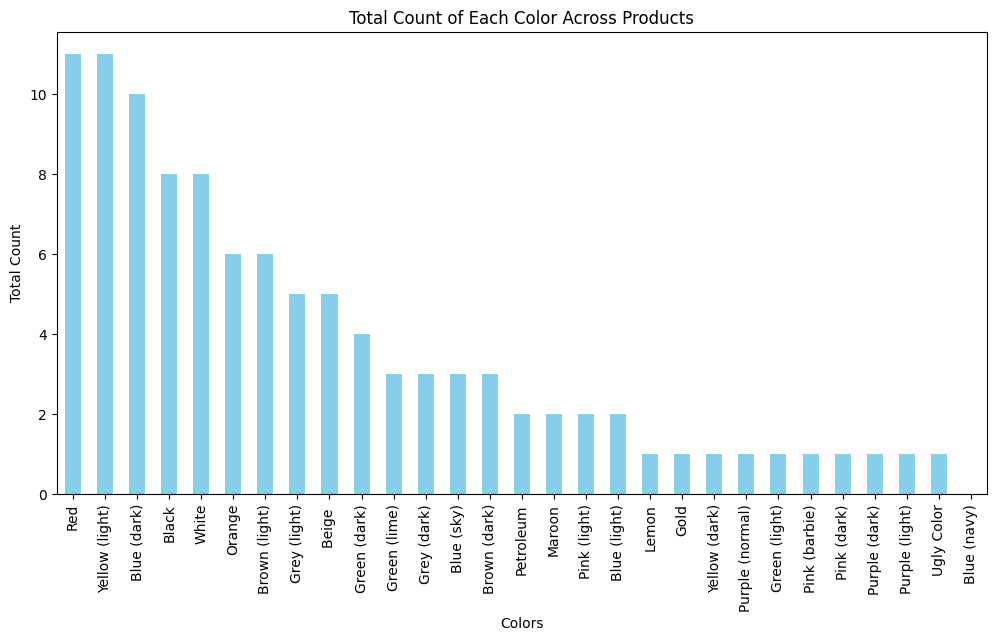

In [4]:
import matplotlib.pyplot as plt

# Summing up each color column to find the most common colors
color_totals = lego_data.iloc[:, 2:].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
color_totals.plot(kind='bar', color='skyblue')
plt.title("Total Count of Each Color Across Products")
plt.xlabel("Colors")
plt.ylabel("Total Count")
plt.show()


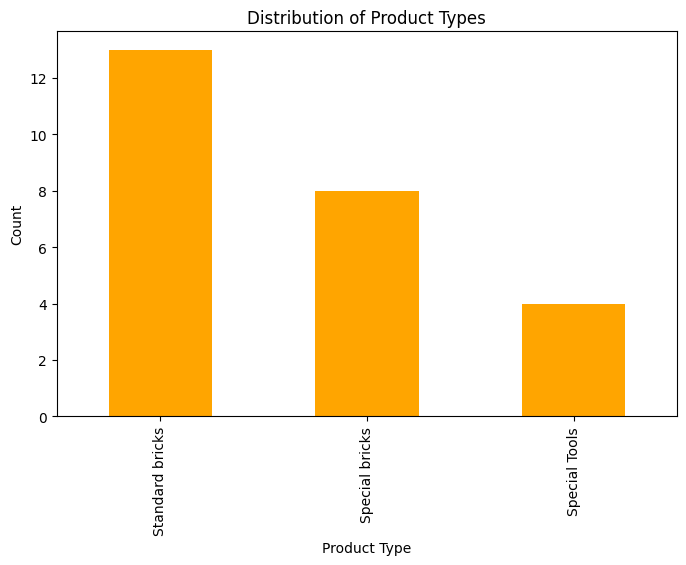

In [5]:
# Counting unique product types and their occurrences
product_type_counts = lego_data['Product type'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
product_type_counts.plot(kind='bar', color='orange')
plt.title("Distribution of Product Types")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.show()


In [6]:
# Count non-null values for color columns in each product
lego_data['Color Variety'] = lego_data.iloc[:, 2:].notnull().sum(axis=1)
top_variety_products = lego_data[['Product/Color', 'Color Variety']].sort_values(by='Color Variety', ascending=False).head(5)

top_variety_products


,Product/Color,Color Variety
9,L2x1,11
4,L4x2,7
15,L1x1S,6
7,L2x2,5
11,L4x1,5


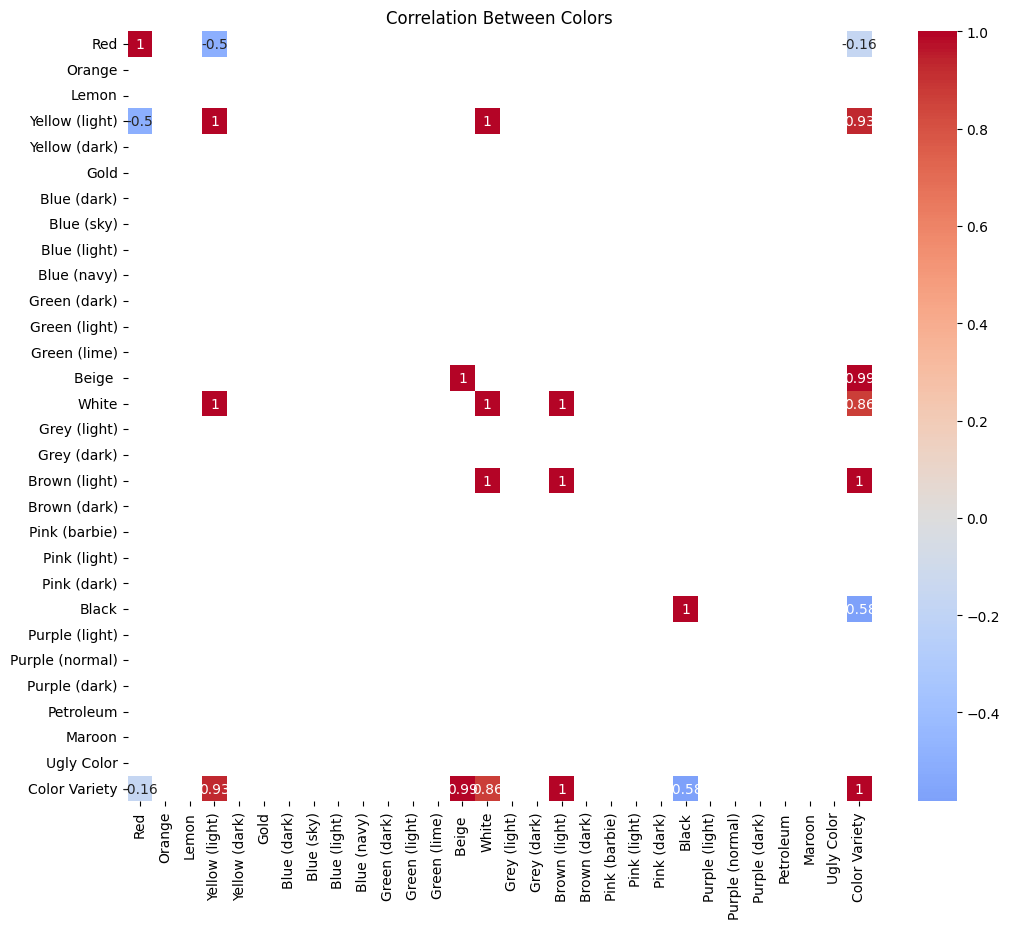

In [7]:
import seaborn as sns

# Calculating correlation matrix for color columns
color_correlation = lego_data.iloc[:, 2:].corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(color_correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Colors")
plt.show()


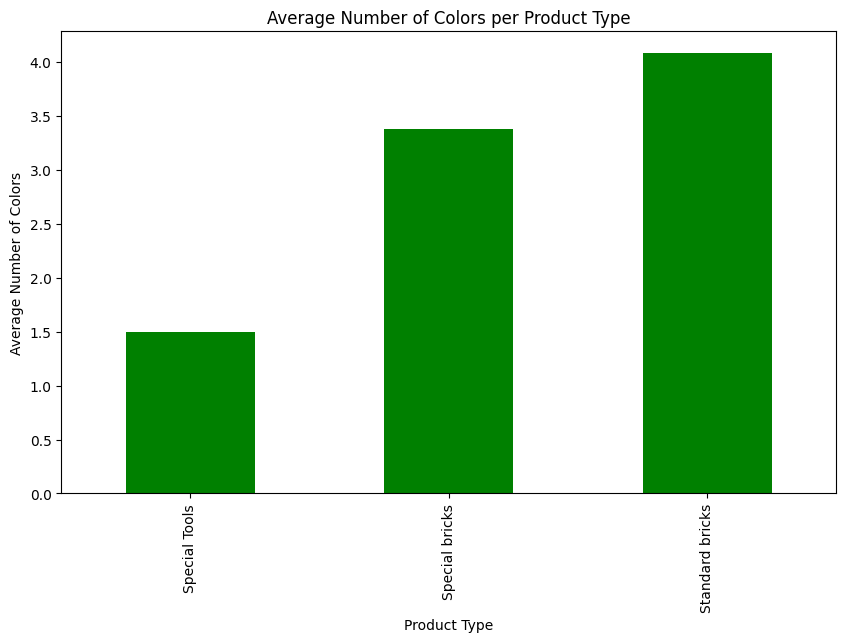

In [8]:
# Calculate average number of colors for each product type
average_colors_per_type = lego_data.groupby('Product type')['Color Variety'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_colors_per_type.plot(kind='bar', color='green')
plt.title("Average Number of Colors per Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Number of Colors")
plt.show()


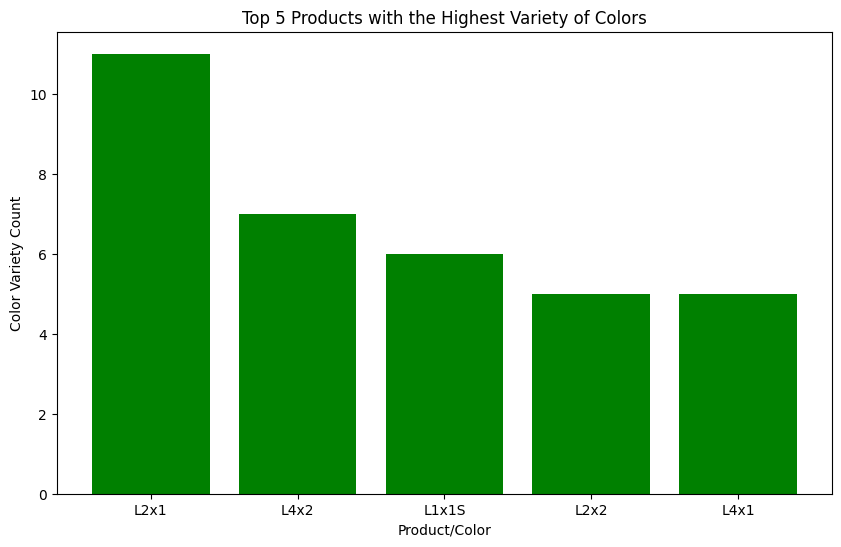

In [10]:
# Visualizing top 5 products with the highest color variety
top_variety_products = lego_data[['Product/Color', 'Color Variety']].sort_values(by='Color Variety', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_variety_products['Product/Color'], top_variety_products['Color Variety'], color='green')
plt.title("Top 5 Products with the Highest Variety of Colors")
plt.xlabel("Product/Color")
plt.ylabel("Color Variety Count")
plt.show()


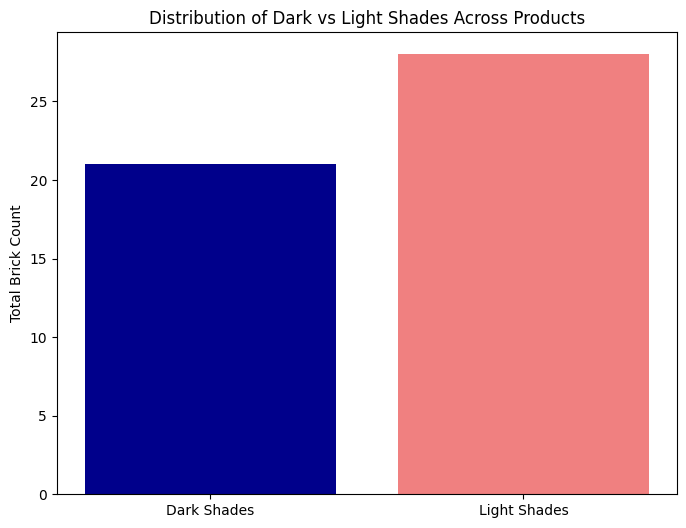

In [11]:
# Summing up dark and light shades separately
dark_colors = ['Blue (dark)', 'Green (dark)', 'Grey (dark)', 'Brown (dark)', 'Purple (dark)']
light_colors = ['Yellow (light)', 'Blue (light)', 'Green (light)', 'Grey (light)', 'Brown (light)', 'Pink (light)', 'Purple (light)']

dark_totals = lego_data[dark_colors].sum().sum()
light_totals = lego_data[light_colors].sum().sum()

# Plotting dark vs light distribution
plt.figure(figsize=(8, 6))
plt.bar(['Dark Shades', 'Light Shades'], [dark_totals, light_totals], color=['darkblue', 'lightcoral'])
plt.title("Distribution of Dark vs Light Shades Across Products")
plt.ylabel("Total Brick Count")
plt.show()
